# Compare the v4.2 recalibrated SDSS Stripe82 catalog 
# and the GALEX catalog

[Link to helper tools](#dataTools) 

[Link to data reading](#dataReading) 

[Link to data analysis](#dataAnalysis) 

In [1]:
%matplotlib inline
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import hstack
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
#from astroML.plotting import hist
# for astroML installation see https://www.astroml.org/user_guide/installation.html

In [2]:
## automatically reload any modules read below that might have changed (e.g. plots)
%load_ext autoreload
%autoreload 2
# importing ZI tools: 
import ZItools as zit
# importing Karun's tools: 
import KTtools as ktt

<a id='dataTools'></a>

### Helper Tools

In [3]:
# robust standard deviation
def sigG(arr):
    return 0.741*(np.quantile(arr, 0.75)-np.quantile(arr, 0.25))

In [4]:
# Due the relative noisiness of the GALEX results, we have increased the 
#  default Y-axis range for the delta_u plots to +/- 0.20 mags from the 
#  +/-0.07 mags for the CFIS jupyter notebook.

# Likewise, should probably increase the range for the delta_RA and 
#  delta_DEC to +/- 3.0 arcsec for the delta_RA and delta_DEC plots...

def doOneColor(d, kw):
    print('=========== WORKING ON:', kw['Ystr'], '===================')
    xVec = d[kw['Xstr']]
    yVec = d[kw['Ystr']]
    # 
    xBin, nPts, medianBin, sigGbin = zit.fitMedians(xVec, yVec, 0.5, 3.1, 52, 0)
    fig,ax = plt.subplots(1,1,figsize=(8,6))
    ax.scatter(xVec, yVec, s=0.01, c='blue')
    ax.scatter(xBin, medianBin, s=5.2, c='yellow')
    ax.set_xlim(0.4,3.2)
    ax.set_ylim(-0.5,0.5)
    ax.set_xlabel(kw['Xstr'])
    ax.set_ylabel(kw['Ystr'])
    d['colorfit'] = np.interp(xVec, xBin, medianBin)
    d['colorresid'] = d[kw['Ystr']] - d['colorfit'] 
    goodC = d[np.abs(d['colorresid'])<0.3]
    
    ### plots 
    # RA
    print(' stats for RA binning medians:')
    plotNameRoot = kw['plotNameRoot'] + kw['Ystr']
    plotName = plotNameRoot + '_RA.png'
    Ylabel =kw['Ystr'] + ' residuals'
    kwOC = {"Xstr":'raW', "Xmin":-52, "Xmax":45, "Xlabel":'R.A. (deg)', \
          "Ystr":'colorresid', "Ymin":-0.20, "Ymax":0.20, "Ylabel":Ylabel, \
          "XminBin":-51.5, "XmaxBin":45, "nBin":56, \
          "plotName":plotName, "Nsigma":3, "offset":0.01, "symbSize":kw['symbSize']}
    zit.plotdelMag(goodC, kwOC)
    print('made plot', plotName)
    
    Ylabel = 'residuals for ($u_{SDSS}$ - $u_{GALEX}$)'
    kwOC = {"Xstr":'raW', "Xmin":-52, "Xmax":60, "Xlabel":'R.A. (deg)', \
          "Ystr":'colorresid', "Ymin":-0.20, "Ymax":0.20, "Ylabel":Ylabel, \
          "XminBin":-51.5, "XmaxBin":60, "nBin":56, \
          "plotName":plotName, "Nsigma":3, "offset":0.01, "symbSize":0.05}
    color = 'colorresid' 
    kwOC["Ystr"] = color 
    plotName = plotNameRoot + '_RA_Hess.png'
    #kwOC["plotName"] = 'colorResidGALEXug_RA_Hess.png'
    kwOC["plotName"] = plotName 
    kwOC["nBinX"] = 55
    kwOC["nBinY"] = 25
    kwOC["cmap"] = 'plasma'
    #ktt.plotdelMagBW_KT(sdssGALEXug, kwOC)
    ktt.plotdelMagBW_KT(goodC, kwOC)
 
    
    
    # Dec
    print('-----------')
    print(' stats for Dec binning medians:')
    plotName = plotNameRoot + '_Dec.png'
    kwOC = {"Xstr":'dec', "Xmin":-1.3, "Xmax":1.3, "Xlabel":'Declination (deg)', \
          "Ystr":'colorresid', "Ymin":-0.20, "Ymax":0.20, "Ylabel":Ylabel, \
          "XminBin":-1.26, "XmaxBin":1.26, "nBin":52, \
          "plotName":plotName, "Nsigma":3, "offset":0.01, "symbSize":kw['symbSize']}
    zit.plotdelMag(goodC, kwOC)

    Ylabel = 'residuals for ($u_{SDSS}$ - $u_{GALEX}$)'
    kwOC = {"Xstr":'dec', "Xmin":-1.3, "Xmax":1.3, "Xlabel":'Declination (deg)', \
          "Ystr":'colorresid', "Ymin":-0.20, "Ymax":0.20, "Ylabel":Ylabel, \
          "XminBin":-1.26, "XmaxBin":1.26, "nBin":52, \
          "plotName":plotName, "Nsigma":3, "offset":0.01, "symbSize":0.05}
    color = 'colorresid' 
    kwOC["Ystr"] = color 
    plotName = plotNameRoot + '_Dec_Hess.png'
    #kwOC["plotName"] = 'colorResidGALEXug_Dec_Hess.png'
    kwOC["plotName"] = plotName 
    kwOC["nBinX"] = 55
    kwOC["nBinY"] = 25
    kwOC["cmap"] = 'plasma'
    #ktt.plotdelMagBW_KT(sdssGALEXug, kwOC)
    ktt.plotdelMagBW_KT(goodC, kwOC)
    
    print('made plot', plotName)

    
    # u SDSS
    print('-----------')
    print(' stats for SDSS u binning medians:')
    plotName = plotNameRoot + '_umag.png'    
    kwOC = {"Xstr":'u_mMed', "Xmin":15.2, "Xmax":22.5, "Xlabel":'SDSS u (mag)', \
          "Ystr":'colorresid', "Ymin":-0.20, "Ymax":0.20, "Ylabel":Ylabel, \
          "XminBin":16, "XmaxBin":22, "nBin":55, \
          "plotName":plotName, "Nsigma":3, "offset":0.01, "symbSize":kw['symbSize']}
    zit.plotdelMag(goodC, kwOC)
    
    Ylabel = 'residuals for ($u_{SDSS}$ - $u_{GALEX}$)'
    kwOC = {"Xstr":'u_mMed', "Xmin":15.2, "Xmax":22.5, "Xlabel":'SDSS u (mag)', \
          "Ystr":'colorresid', "Ymin":-0.20, "Ymax":0.20, "Ylabel":Ylabel, \
          "XminBin":16, "XmaxBin":22, "nBin":55, \
          "plotName":plotName, "Nsigma":3, "offset":0.01, "symbSize":0.05}
    color = 'colorresid' 
    kwOC["Ystr"] = color 
    plotName = plotNameRoot + '_umag_Hess.png'
    #kwOC["plotName"] = 'colorResidGALEXug_umag_Hess.png'
    kwOC["plotName"] = plotName 
    kwOC["nBinX"] = 55
    kwOC["nBinY"] = 25
    kwOC["cmap"] = 'plasma'
    #ktt.plotdelMagBW_KT(sdssGALEXug, kwOC)
    ktt.plotdelMagBW_KT(goodC, kwOC)
    
    
    print('made plot', plotName)
    print('------------------------------------------------------------------')

def doOneColorRA(d, kw):
    print('=========== WORKING ON:', kw['Ystr'], '===================')
    xVec = d[kw['Xstr']]
    yVec = d[kw['Ystr']]
    # 
    xBin, nPts, medianBin, sigGbin = zit.fitMedians(xVec, yVec, 0.5, 3.1, 52, 0)
    fig,ax = plt.subplots(1,1,figsize=(8,6))
    ax.scatter(xVec, yVec, s=0.01, c='blue')
    ax.scatter(xBin, medianBin, s=5.2, c='yellow')
    ax.set_xlim(0.4,3.2)
    ax.set_ylim(-0.5,0.5)
    ax.set_xlabel(kw['Xstr'])
    ax.set_ylabel(kw['Ystr'])
    d['colorfit'] = np.interp(xVec, xBin, medianBin)
    d['colorresid'] = d[kw['Ystr']] - d['colorfit'] 
    goodC = d[np.abs(d['colorresid'])<0.3]
    
    ### plots 
    # RA
    print(' stats for RA binning medians:')
    plotNameRoot = kw['plotNameRoot'] + kw['Ystr']
    plotName = plotNameRoot + '_RA.png'
    Ylabel = 'u band residuals (SDSS vs. GALEX, BP-RP)'
    kwOC = {"Xstr":'raW', "Xmin":-52, "Xmax":62, "Xlabel":'R.A. (deg)', \
          "Ystr":'colorresid', "Ymin":-0.20, "Ymax":0.20, "Ylabel":Ylabel, \
          "XminBin":-48, "XmaxBin":45, "nBin":56, \
          "plotName":plotName, "Nsigma":3, "offset":0.01, "symbSize":kw['symbSize']}
    plotdelMag2(goodC, kwOC, True)
    print('made plot', plotName)   

    
def doOneColorDec(d, kw):
    print('=========== WORKING ON:', kw['Ystr'], '===================')
    xVec = d[kw['Xstr']]
    yVec = d[kw['Ystr']]
    # 
    xBin, nPts, medianBin, sigGbin = zit.fitMedians(xVec, yVec, 0.5, 3.1, 52, 0)
    fig,ax = plt.subplots(1,1,figsize=(8,6))
    ax.scatter(xVec, yVec, s=0.01, c='blue')
    ax.scatter(xBin, medianBin, s=5.2, c='yellow')
    ax.set_xlim(0.4,3.2)
    ax.set_ylim(-0.5,0.5)
    ax.set_xlabel(kw['Xstr'])
    ax.set_ylabel(kw['Ystr'])
    d['colorfit'] = np.interp(xVec, xBin, medianBin)
    d['colorresid'] = d[kw['Ystr']] - d['colorfit'] 
    goodC = d[np.abs(d['colorresid'])<0.3]
    
    ### plots 
    # Dec
    print('-----------')
    print(' stats for Dec binning medians:')
    plotNameRoot = kw['plotNameRoot'] + kw['Ystr']
    plotName = plotNameRoot + '_Dec.png'
    Ylabel = 'u band residuals (SDSS vs. GALEX, BP-RP)'
    kwOC = {"Xstr":'dec', "Xmin":-1.3, "Xmax":1.3, "Xlabel":'Declination (deg)', \
          "Ystr":'colorresid', "Ymin":-0.20, "Ymax":0.20, "Ylabel":Ylabel, \
          "XminBin":-1.26, "XmaxBin":1.26, "nBin":35, \
          "plotName":plotName, "Nsigma":3, "offset":0.01, "symbSize":kw['symbSize']}
    plotdelMag2(goodC, kwOC, False)
    print('made plot', plotName)
 



In [5]:
## a horrible hack to compare GALEX and SDSS results for the u band
def plotdelMag2(d, kw, RA=True):
 
    print('medianAll:', np.median(d[kw['Ystr']]), 'std.dev.All:', sigG(d[kw['Ystr']]))
    print('N=', np.size(d[kw['Ystr']]), 'min=', np.min(d[kw['Ystr']]), 'max=', np.max(d[kw['Ystr']]))

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.scatter(d[kw['Xstr']], d[kw['Ystr']], s=kw['symbSize'], c='black') 
    # binning
    xBinM, nPtsM, medianBinM, sigGbinM = zit.fitMedians(d[kw['Xstr']], \
                                         d[kw['Ystr']], kw['XminBin'], kw['XmaxBin'], kw['nBin'], 1)
    # plotting
    if (kw['offset'] >= 0):
        xL = np.linspace(kw['XminBin'], kw['XmaxBin'])
        ax.plot(xL, 0*xL, '-', c='red', linewidth=3)
        ax.plot(xL, 0*xL+kw['offset'], '--', c='red', linewidth=3)
        ax.plot(xL, 0*xL-kw['offset'], '--', c='red', linewidth=3)
    if (0):
        ax.scatter(xBinM, medianBinM, s=30.0, c='black', alpha=0.8)
        ax.scatter(xBinM, medianBinM, s=15.0, c='yellow', alpha=0.3)
    #
    TwoSigP = medianBinM + kw['Nsigma']*sigGbinM
    TwoSigM = medianBinM - kw['Nsigma']*sigGbinM 
    ax.plot(xBinM, TwoSigP, c='yellow', linewidth=3)
    ax.plot(xBinM, TwoSigM, c='yellow', linewidth=3)
    #
    rmsBin = np.sqrt(nPtsM) / np.sqrt(np.pi/2) * sigGbinM
    rmsP = medianBinM + rmsBin
    rmsM = medianBinM - rmsBin
    ax.plot(xBinM, rmsP, c='cyan', linewidth=3)
    ax.plot(xBinM, rmsM, c='cyan', linewidth=3)
    # 
    if (RA):
       # read back 
        zpRAgrid, zpRA = np.loadtxt('ZPcorrectionsRA_Gaia_uband_v3.2.dat')  
        ax.plot(zpRAgrid, zpRA, c='blue', linewidth=3)
        here = np.interp(xBinM, zpRAgrid, zpRA) - medianBinM 
        print(np.min(here), np.max(here), sigG(here))
    else:
        zpDecgrid, zpDec = np.loadtxt('ZPcorrectionsDec_Gaia_uband_v3.2.dat')   
        ax.plot(zpDecgrid, zpDec, c='blue', linewidth=3)
        here = np.interp(xBinM, zpDecgrid, zpDec) - medianBinM 
        print(np.min(here), np.max(here), sigG(here))



    ax.set_xlabel(kw['Xlabel'], fontsize=22)
    ax.set_ylabel(kw['Ylabel'], fontsize=22)
    ax.set_xlim(kw['Xmin'], kw['Xmax'])
    ax.set_ylim(kw['Ymin'], kw['Ymax'])
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.savefig(kw['plotName'], dpi=600)
    print('saved plot as:', kw['plotName']) 
    
    
    plt.show()
    return

In [6]:
# both new and old files use identical data structure
colnamesSDSS = ['calib_fla', 'ra', 'dec', 'raRMS', 'decRMS', 'nEpochs', 'AR_val', 
                'u_Nobs', 'u_mMed', 'u_mMean', 'u_mErr', 'u_rms_scatt', 'u_chi2',
                'g_Nobs', 'g_mMed', 'g_mMean', 'g_mErr', 'g_rms_scatt', 'g_chi2',
                'r_Nobs', 'r_mMed', 'r_mMean', 'r_mErr', 'r_rms_scatt', 'r_chi2',
                'i_Nobs', 'i_mMed', 'i_mMean', 'i_mErr', 'i_rms_scatt', 'i_chi2',
                'z_Nobs', 'z_mMed', 'z_mMean', 'z_mErr', 'z_rms_scatt', 'z_chi2']

### code for generating new quantities, such as dra, ddec, colors, differences in mags, etc
def derivedColumns(matches):
    matches['dra'] = (matches['ra_sdss']-matches['ra_galex'])*3600
    matches['ddec'] = (matches['dec_sdss']-matches['dec_galex'])*3600
    ra = matches['ra_sdss'] 
    matches['raW'] = np.where(ra > 180, ra-360, ra) 
    matches['ug'] = matches['u_mMed'] - matches['g_mMed']
    matches['gr'] = matches['g_mMed'] - matches['r_mMed']
    matches['ri'] = matches['r_mMed'] - matches['i_mMed']
    matches['gi'] = matches['g_mMed'] - matches['i_mMed']
    matches['iz'] = matches['i_mMed'] - matches['z_mMed']
    matches['NUVg'] = matches['NUV_MAG'] - matches['g_mMed']
    ## Original/Old transformation from GALEX NUV and SDSS g,i to SDSS u...
    #matches['u_est'] = matches['NUV_MAG'] \
    #                    + 0.939  \
    #                    - 1.008*matches['NUVg'] + 0.017*matches['NUVg']*matches['NUVg'] \
    #                    - 0.599*matches['gi'] + 0.860*matches['gi']*matches['gi']
    #New (7 Dec 2020) transformation from GALEX NUV and SDSS g,i to SDSS u...
    # Includes correction for E(B-V) > 0.15...
    matches['ebv_mask'] = 0
    matches['ebv_mask'][ (matches['E_BV'] > 0.15) ] = 1
    #matches[ (matches['E_BV'] > 0.15) ]
    # We keep a version of "u_est" and of "du_est" without the E(B-V) correction, for sanity checks...
    #  "u_est_no_ebv" is the no-E(B-V) version of "u_est"
    matches['u_est_no_ebv'] = matches['NUV_MAG'] \
                        + 0.835  \
                        - 0.990*matches['NUVg'] + 0.014*matches['NUVg']*matches['NUVg'] \
                        - 0.407*matches['gi'] + 0.797*matches['gi']*matches['gi']
    #  "u_est" is the with-E(B-V) version of "u_est and is the version generally to be used..."
    matches['u_est'] = matches['u_est_no_ebv'] \
                        - 1.346*(matches['E_BV']-0.15)*matches['ebv_mask'] \
                        + 3.400*(matches['E_BV']-0.15)*(matches['E_BV']-0.15)*matches['ebv_mask']
    
    #  "du_est_no_ebv" is the no-E(B-V) version of "du_est"
    matches['du_est_no_ebv'] = matches['u_mMed'] - matches['u_est_no_ebv']
    #  "du_est" is the with-E(B-V) version of "du_est and is the version generally to be used..."
    matches['du_est'] = matches['u_mMed'] - matches['u_est']
    
    return

<a id='dataReading'></a>

### Define paths and catalogs 

In [7]:
#ZIdataDir = "/Users/ivezic/Work/Science/CalibrationV2/SDSS_SSC/Data"
ZIdataDir = "/data/des40.a/data/dtucker/Stripe82Stds/SDSSSSC/allDataThanjavurPaper"
# original analysis
# SDSScatalog = ZIdataDir + "/" + "stripe82calibStars_v3.2.dat" 
# final analysis
# SDSScatalog = ZIdataDir + "/" + "stripe82calibStars_v3.2_noheader_final.dat"
SDSScatalog = ZIdataDir + "/" + "stripe82calibStars_v4.2.dat"
# GALEX catalog (from Sahar and Douglas)
#GALEXcatalog = ZIdataDir + "/" + "sdssdr13Stripe82_GALEX_matches.csv"
GALEXcatalog = ZIdataDir + "/" + "match_stripe82calibStars_v4.2_GALEX.csv"
#colnamesGALEX = ['ra', 'dec', 'upsf', 'uauto', 'upsfErr', 'uautoErr', 'sg']
#colnamesGALEX = ['RA', 'DEC', 'NUV_MAG', 'NUV_MAGERR', 'NUV_CLASS_STAR', 'E_BV']
colnamesGALEX = ['RAJ2000', 'DEJ2000', 'NUVmag', 'e_NUVmag', 'E_BV']
# Use pandas to grab just a certain subset of columns from GALEXcatalog...
galex_df = pd.read_csv(GALEXcatalog, usecols=colnamesGALEX)
galex_df.rename(columns = {'RAJ2000':'ra', 'DEJ2000':'dec', 'NUVmag':'NUV_MAG', 'e_NUVmag':'NUV_MAGERR'}, inplace=True)
galex = Table.from_pandas(galex_df)
#cfis = Table.read(GALEXcatalog, format='csv', names=colnamesGALEX) 

In [8]:
galex 

<Table length=89724>
        ra                dec         ... NUV_MAG      NUV_MAGERR    
     float64            float64       ... float64       float64      
------------------ ------------------ ... ------- -------------------
310.75138300000003           0.862366 ... 22.2474              0.4187
        310.785272            0.96646 ... 21.9738 0.41200000000000003
         310.79873           0.840514 ... 21.3614              0.3016
        310.799234 1.0296370000000001 ... 22.7815              0.4177
        310.830765           0.955909 ... 22.1327              0.4225
310.84680099999997           1.043023 ... 21.6126              0.3823
        310.857886           0.905381 ...   20.78              0.1964
        310.857684            0.99156 ...   21.92              0.3478
        310.860908 0.9658370000000001 ... 21.6781              0.3124
        310.862992           1.002594 ... 21.2633              0.2152
               ...                ... ...     ...                 ...
59.544154000000006 0.8035359999999999 ... 21.6056              0.3666
         59.352165           1.247395 ... 19.9964              0.2131
59.589017000000005           1.078232 ... 21.4075              0.4309
59.631991000000006           1.218401 ... 20.8118              0.3279
         59.750661 1.0643049999999998 ... 21.0043              0.3733
         59.972599           1.058142 ... 21.0303              0.2403
59.997718000000006           1.077655 ... 21.0069              0.2469
         59.073599           1.206153 ... 20.5293              0.1366
         59.322407           1.186237 ... 20.9594              0.3974
 59.40268100000001           0.640371 ... 20.9798               0.171

In [9]:
sdss = Table.read(SDSScatalog, format='ascii', names=colnamesSDSS)

In [10]:
sdss_coords = SkyCoord(ra = sdss['ra']*u.degree, dec= sdss['dec']*u.degree) 
galex_coords = SkyCoord(ra = galex['ra']*u.degree, dec= galex['dec']*u.degree) 

# this is matching galex to sdss, so that indices are into sdss catalog
# makes sense in this case since the sdss catalog is bigger than galex
idx, d2d, d3d = galex_coords.match_to_catalog_sky(sdss_coords)  

# object separation is an object with units, 
# I add that as a column so that one can 
# select based on separation to the nearest matching object
sdssGALEXall = hstack([galex, sdss[idx]], table_names = ['galex', 'sdss'])
sdssGALEXall['sep_2d_arcsec'] = d2d.arcsec

In [11]:
print(np.min(galex['ra']), np.max(galex['ra']))

0.000192 359.99953


In [12]:
# Let's use a 3.0-arcsec search radius for GALEX matches...
sdssGALEX = sdssGALEXall[sdssGALEXall['sep_2d_arcsec']<3.0]
print(np.size(sdssGALEXall), np.size(sdssGALEX))

89724 89722


In [13]:
sdssGALEX

<Table length=89722>
     ra_galex          dec_galex      ...  z_chi2   sep_2d_arcsec   
     float64            float64       ... float64      float64      
------------------ ------------------ ... ------- ------------------
310.75138300000003           0.862366 ...   0.603 1.2347489707963502
        310.785272            0.96646 ...   0.624 1.8631513925881558
         310.79873           0.840514 ...   1.367 0.7024443225131075
        310.799234 1.0296370000000001 ...   0.386  1.335480246031272
        310.830765           0.955909 ...   0.806 2.0058856863587713
310.84680099999997           1.043023 ...   1.133 1.6704011319519936
        310.857886           0.905381 ...   0.369 2.8626423520213207
        310.857684            0.99156 ...   0.322 0.3354164686214916
        310.860908 0.9658370000000001 ...   0.571  1.746255146972593
        310.862992           1.002594 ...   1.153 0.9905370213469494
               ...                ... ...     ...                ...
59.544154000000006 0.8035359999999999 ...   0.705  2.013826085357132
         59.352165           1.247395 ...   0.653 0.8408551266999148
59.589017000000005           1.078232 ...   0.475   1.20218371631458
59.631991000000006           1.218401 ...   0.671 1.5628605016459822
         59.750661 1.0643049999999998 ...   0.558 0.5490023775372154
         59.972599           1.058142 ...   0.749 1.1709986335261189
59.997718000000006           1.077655 ...   0.795 1.6552764688695352
         59.073599           1.206153 ...   0.911 0.6332955856904678
         59.322407           1.186237 ...   0.169 2.3108425077432306
 59.40268100000001           0.640371 ...   0.602 0.4332159972341418

In [14]:
derivedColumns(sdssGALEX)

In [15]:
sdssGALEX

<Table length=89722>
     ra_galex          dec_galex      ...         du_est       
     float64            float64       ...        float64       
------------------ ------------------ ... ---------------------
310.75138300000003           0.862366 ...    -2.983795800440017
        310.785272            0.96646 ...    0.5779910158400021
         310.79873           0.840514 ...   0.07059313195999906
        310.799234 1.0296370000000001 ...   0.12181852349999645
        310.830765           0.955909 ...   0.20532460753999615
310.84680099999997           1.043023 ...    0.1099148859600021
        310.857886           0.905381 ...   0.11371495700000267
        310.857684            0.99156 ...  -0.04065440300000134
        310.860908 0.9658370000000001 ...  0.020381779859995675
        310.862992           1.002594 ...  -0.01116092866000784
               ...                ... ...                   ...
59.544154000000006 0.8035359999999999 ...   0.08096773075999764
         59.352165           1.247395 ...  -0.06920677684000509
59.589017000000005           1.078232 ...  0.025030615500000408
59.631991000000006           1.218401 ...  -0.12662684896000087
         59.750661 1.0643049999999998 ...  -0.10197393766000218
         59.972599           1.058142 ...  -0.13365509845999668
59.997718000000006           1.077655 ...  -0.15767582374000355
         59.073599           1.206153 ...  -0.00973058586000164
         59.322407           1.186237 ... -0.006137415040001315
 59.40268100000001           0.640371 ...  -0.09881417856000141

In [16]:
sdssGALEX[ (sdssGALEX['E_BV'] > 0.15) ]

<Table length=1406>
     ra_galex           dec_galex      ...         du_est       
     float64             float64       ...        float64       
------------------ ------------------- ... ---------------------
        308.508535           -1.213858 ...  0.016597697340007045
308.51016400000003            -1.16854 ...  -0.05687555053999915
        308.511735           -1.263357 ...  -0.03523989394000537
        308.522373           -1.207259 ...  -0.08345716214000021
        308.527466 -1.2130239999999999 ...  -0.16675845736000383
        308.529624           -1.177255 ...    0.2008408612599979
        308.532492           -1.128396 ...   -0.9990411600000009
308.54121200000003 -1.1563459999999999 ...  0.013390595059995292
        308.549628           -1.201242 ...   -0.0781057686400004
        308.565497 -1.1134879999999998 ...    0.0653101802399938
               ...                 ... ...                   ...
59.544154000000006  0.8035359999999999 ...   0.08096773075999764
         59.352165            1.247395 ...  -0.06920677684000509
59.589017000000005            1.078232 ...  0.025030615500000408
59.631991000000006            1.218401 ...  -0.12662684896000087
         59.750661  1.0643049999999998 ...  -0.10197393766000218
         59.972599            1.058142 ...  -0.13365509845999668
59.997718000000006            1.077655 ...  -0.15767582374000355
         59.073599            1.206153 ...  -0.00973058586000164
         59.322407            1.186237 ... -0.006137415040001315
 59.40268100000001            0.640371 ...  -0.09881417856000141

In [17]:
sdssGALEX.sort('E_BV')
sdssGALEX

<Table length=89722>
     ra_galex            dec_galex       ...         du_est       
     float64              float64        ...        float64       
------------------ --------------------- ... ---------------------
         11.199782             -0.098591 ... -0.010378003059997809
         11.106634  -0.15775899999999998 ...   0.04746310600000214
         11.169508  -0.22026500000000002 ... -0.028991637260002534
         11.265742              0.105018 ...    0.1685681022399983
         11.214072  -0.13786900000000002 ... -0.015032299859999654
         11.317245              0.066076 ...    0.0870386089399986
11.147996000000001              -0.01034 ...  -0.42150526686000234
         11.349125  0.057541999999999996 ...   0.04218912903999694
         11.074131             -0.075951 ...  0.015913836239999313
11.114692999999999 -0.061440999999999996 ...   -0.0799826699599997
               ...                   ... ...                   ...
58.830431999999995               0.75802 ...   -0.6668802567400007
58.904481000000004              0.485653 ...  -0.39228236655999993
         58.932389              0.508606 ...   -0.7902799426599998
         58.573125              0.468371 ...   -0.2464395205000045
         58.856074              0.510733 ...   -0.7375509019599988
         58.832354   0.44851599999999997 ...    -7.954905664539993
58.719378000000006    0.6644359999999999 ...   -0.4283426257400009
         58.685587              0.527753 ...   -0.5987108713400033
58.623743999999995    0.5126649999999999 ...  -0.25785928556000215
58.624148999999996              0.456409 ...   -0.7022441544399989

In [18]:
#Write sdssGALEX table out to a CSV file for tests with TOPCAT...
df_sdssGALEX = Table.to_pandas(sdssGALEX)
df_sdssGALEX.to_csv('sdssGALEX_v4.2.csv')

In [19]:
sdssGALEX['ra'] = sdssGALEX['ra_sdss']
sdssGALEX['dec'] = sdssGALEX['dec_sdss']
#sdssCFIS['duCFIS'] = sdssCFIS['upsf'] - sdssCFIS['uauto']

In [20]:
#sdssGALEXug = sdssGALEX[(sdssGALEX['ug']>1.0)&(sdssGALEX['ug']<2.1)]
#sdssGALEXbright = sdssGALEXug[sdssGALEXug['r_mMed']<20]
#print(np.size(sdssGALEX), np.size(sdssGALEXug), np.size(sdssGALEXbright))
#    mask = ( ( df['ug_sdss'] > 0.5 ) & ( df['ug_sdss'] < 2.0 ) &
#             ( df['gr_sdss'] > 0.2 ) & ( df['gr_sdss'] < 0.8 ) &
#             ( df['gi_sdss'] > 0.3 ) & ( df['gi_sdss'] < 1.0 ) &  
#             ( df['uNUV'] > -10 ) & ( df['uNUV'] < 10.0 )      &
#             ( df['NUVg'] > -10 ) & ( df['NUVg'] < 10.0 )      &
#             ( df['uerr_sdss'] < 0.02 ) & 
#             ( df['E_BV'] < 0.5 ) )

# Applying the above mask to the sdssGALEX data...
#  (Could consider even more restrictive cuts if desired...)
sdssGALEXug = sdssGALEX[(sdssGALEX['ug']>0.5)&(sdssGALEX['ug']<2.0)&(sdssGALEX['gr']>0.2)&(sdssGALEX['gr']<0.8)&(sdssGALEX['gi']>0.3)&(sdssGALEX['gi']<1.0)&(sdssGALEX['E_BV']<0.3)]

# Instead of mag cut, here we used a magErr cut...
##  (Could revert to a mag cut, or go to a combined mag AND magErr cut...)
#sdssGALEXbright = sdssGALEXug[(sdssGALEXug['u_mErr']<=0.02)]
sdssGALEXbright = sdssGALEXug[sdssGALEXug['u_mMed']<=20.0]
print(np.size(sdssGALEX), np.size(sdssGALEXug), np.size(sdssGALEXbright))

89722 80053 69783


In [21]:
sdssGALEXug

<Table length=80053>
     ra_galex            dec_galex       ...     ra       dec   
     float64              float64        ...  float64   float64 
------------------ --------------------- ... --------- ---------
         11.199782             -0.098591 ... 11.199835 -0.098666
         11.106634  -0.15775899999999998 ... 11.106689 -0.157773
         11.169508  -0.22026500000000002 ... 11.169757 -0.220399
         11.265742              0.105018 ... 11.265475  0.104336
         11.214072  -0.13786900000000002 ... 11.214181 -0.138094
         11.317245              0.066076 ... 11.317794  0.065728
         11.349125  0.057541999999999996 ... 11.349236  0.057383
         11.074131             -0.075951 ...  11.07418 -0.076275
11.114692999999999 -0.061440999999999996 ... 11.114777 -0.061568
         11.164882             -0.284912 ... 11.164859 -0.285348
               ...                   ... ...       ...       ...
         59.386239              0.929004 ... 59.386457  0.928807
         59.493564              0.819866 ... 59.493777  0.820047
          59.62166              1.193785 ... 59.621616  1.193827
          58.24406   0.44688599999999995 ... 58.243817  0.446797
58.285160999999995               0.76027 ...  58.28539  0.760407
         59.429329              0.676433 ... 59.429195  0.676432
         59.386231              0.772729 ... 59.385587  0.772263
         59.501349              0.676182 ... 59.501335  0.675751
         59.363964    0.8758360000000001 ... 59.364221  0.875794
         58.278677    0.6127600000000001 ... 58.278738  0.612674

=========== WORKING ON: du_est ===================
 stats for RA binning medians:
medianAll: -0.0001056208665999924 std.dev.All: 0.05453636369503505
N= 79860 min= -0.29985098162959734 max= 0.2995129152464032
median: 0.0009811945851027535 std.dev: 0.008691305548675332
saved plot as: colorResidGALEXug_du_est_RA.png


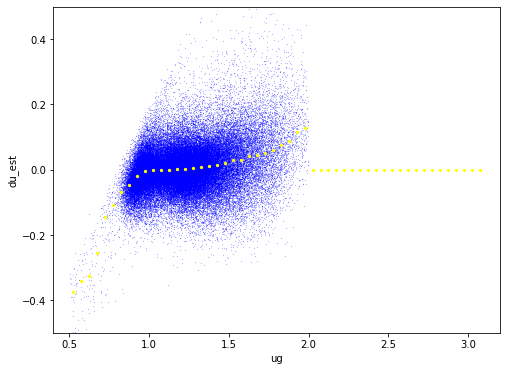

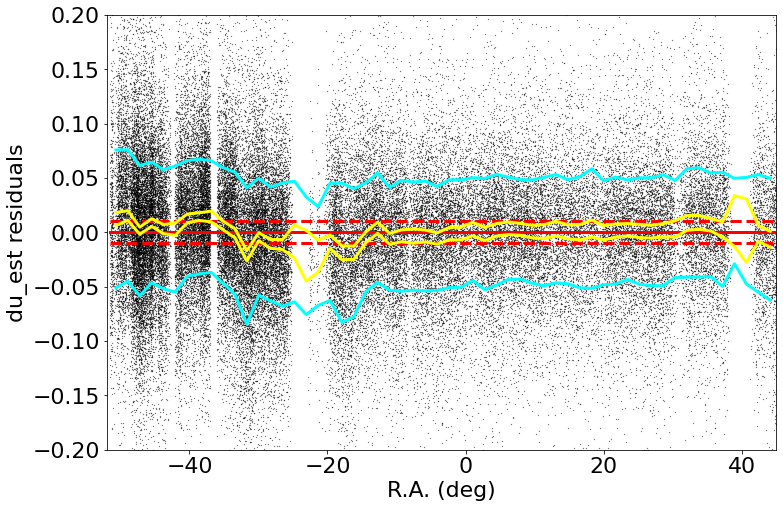

made plot colorResidGALEXug_du_est_RA.png
medianAll: -0.0001056208665999924 std.dev.All: 0.05453636369503505
N= 79860 min= -0.29985098162959734 max= 0.2995129152464032
median: 2.501259855016116e-05 std.dev: 0.009172412484645604
saved plot as: colorResidGALEXug_du_est_RA_Hess.png


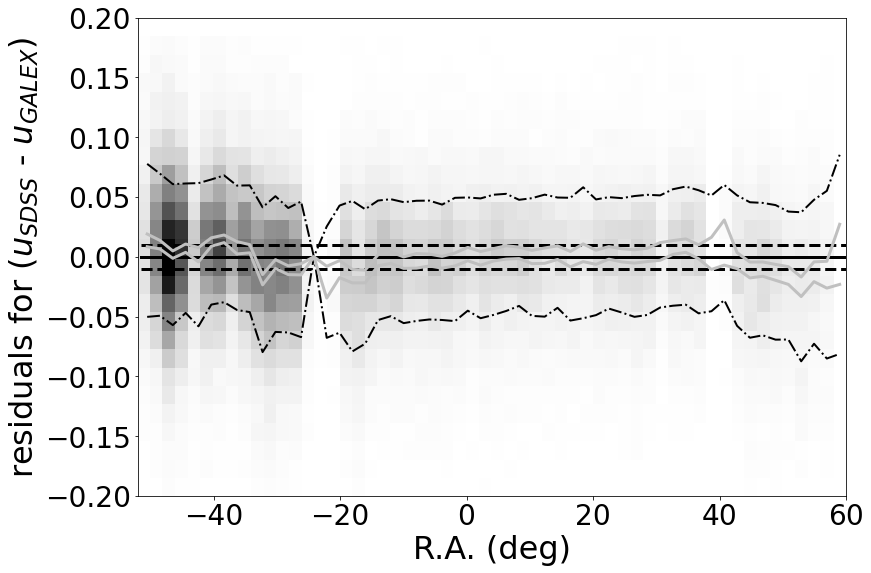

-----------
 stats for Dec binning medians:
medianAll: -0.0001056208665999924 std.dev.All: 0.05453636369503505
N= 79860 min= -0.29985098162959734 max= 0.2995129152464032
median: -0.001124326405796009 std.dev: 0.005324759578708154
saved plot as: colorResidGALEXug_du_est_Dec.png


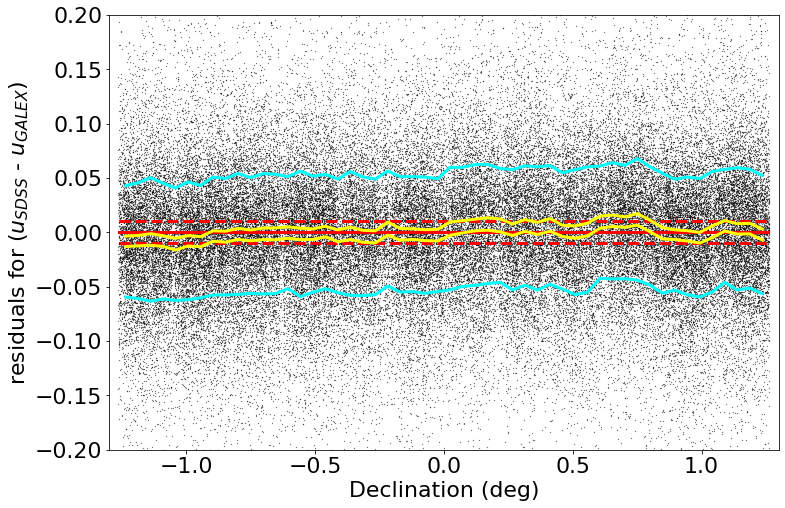

medianAll: -0.0001056208665999924 std.dev.All: 0.05453636369503505
N= 79860 min= -0.29985098162959734 max= 0.2995129152464032
median: -0.0013579919087984256 std.dev: 0.005210972701913607
saved plot as: colorResidGALEXug_du_est_Dec_Hess.png


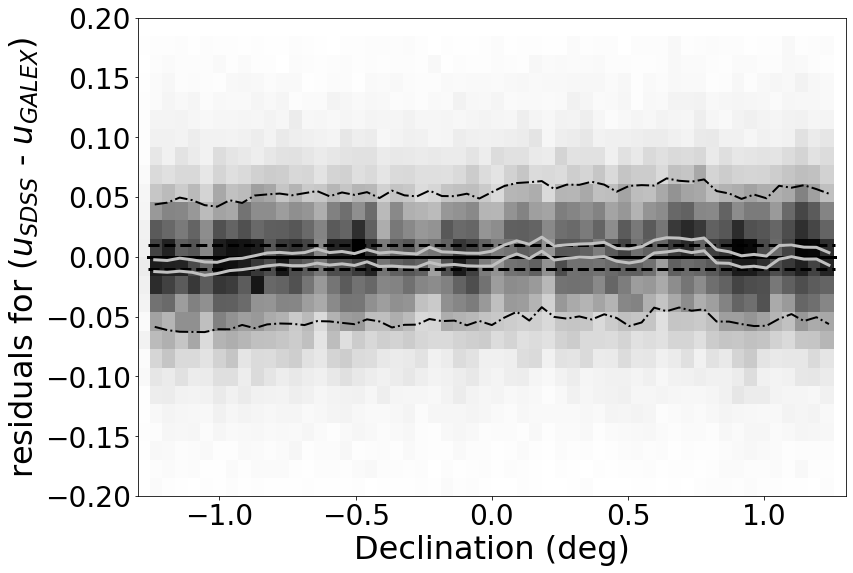

made plot colorResidGALEXug_du_est_Dec_Hess.png
-----------
 stats for SDSS u binning medians:
medianAll: -0.0001056208665999924 std.dev.All: 0.05453636369503505
N= 79860 min= -0.29985098162959734 max= 0.2995129152464032
median: 0.0033065039885996584 std.dev: 0.024499690059484908
saved plot as: colorResidGALEXug_du_est_umag.png


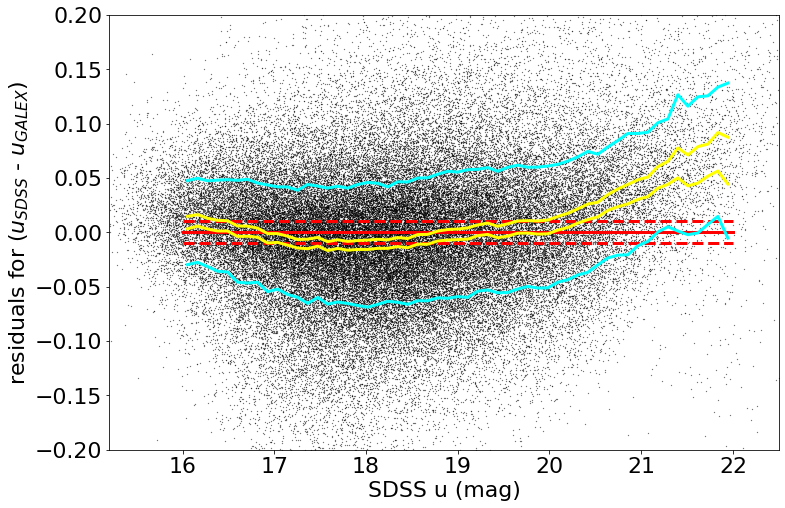

medianAll: -0.0001056208665999924 std.dev.All: 0.05453636369503505
N= 79860 min= -0.29985098162959734 max= 0.2995129152464032
median: 0.0033065039885996584 std.dev: 0.024499690059484908
saved plot as: colorResidGALEXug_du_est_umag_Hess.png


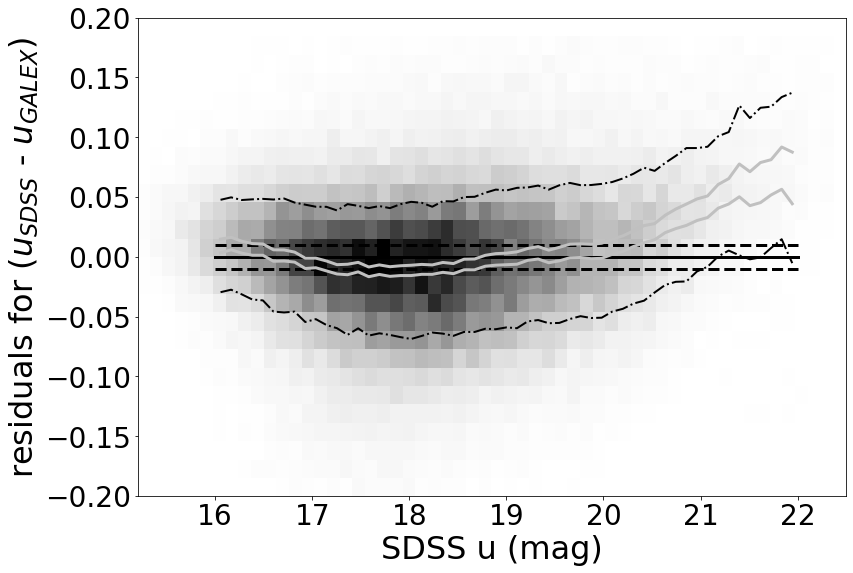

made plot colorResidGALEXug_du_est_umag_Hess.png
------------------------------------------------------------------
=========== WORKING ON: dra ===================
 stats for RA binning medians:
medianAll: -0.0016019999942395655 std.dev.All: 0.21333464097605995
N= 27416 min= -0.29995200004282196 max= 0.2999520001103534
median: 7.200010614927255e-05 std.dev: 0.027239466178148854
saved plot as: colorResidGALEXug_dra_RA.png


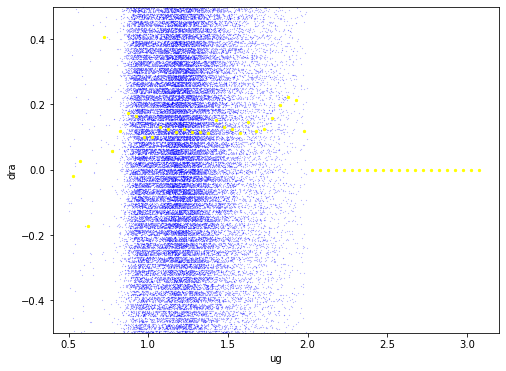

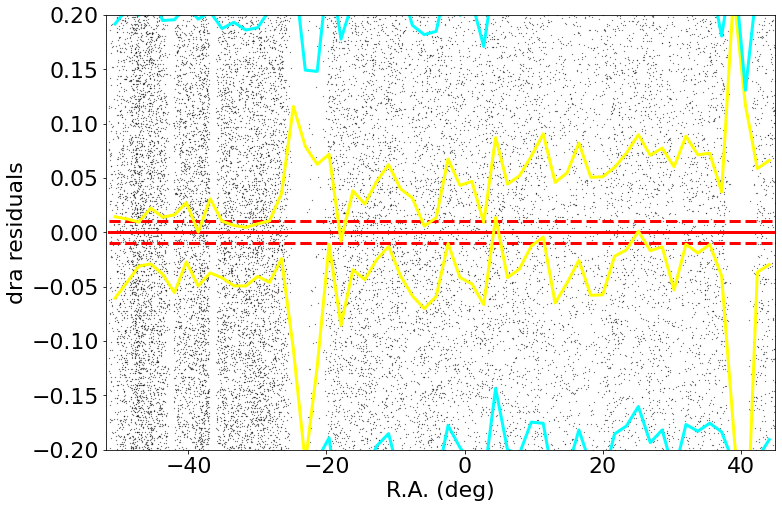

made plot colorResidGALEXug_dra_RA.png
medianAll: -0.0016019999942395655 std.dev.All: 0.21333464097605995
N= 27416 min= -0.29995200004282196 max= 0.2999520001103534
median: 0.00693000002526117 std.dev: 0.02319915745128109
saved plot as: colorResidGALEXug_dra_RA_Hess.png


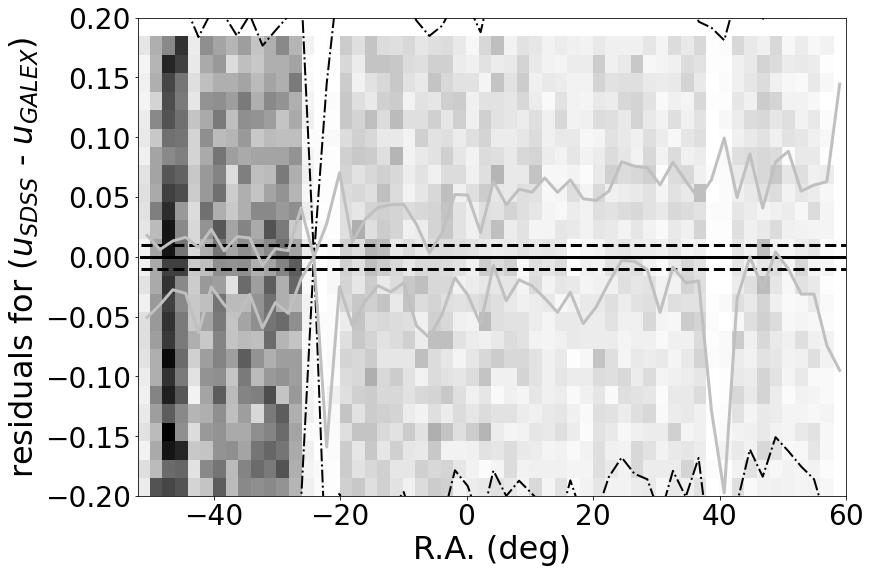

-----------
 stats for Dec binning medians:
medianAll: -0.0016019999942395655 std.dev.All: 0.21333464097605995
N= 27416 min= -0.29995200004282196 max= 0.2999520001103534
median: -0.0029519999925469616 std.dev: 0.013390814124885485
saved plot as: colorResidGALEXug_dra_Dec.png


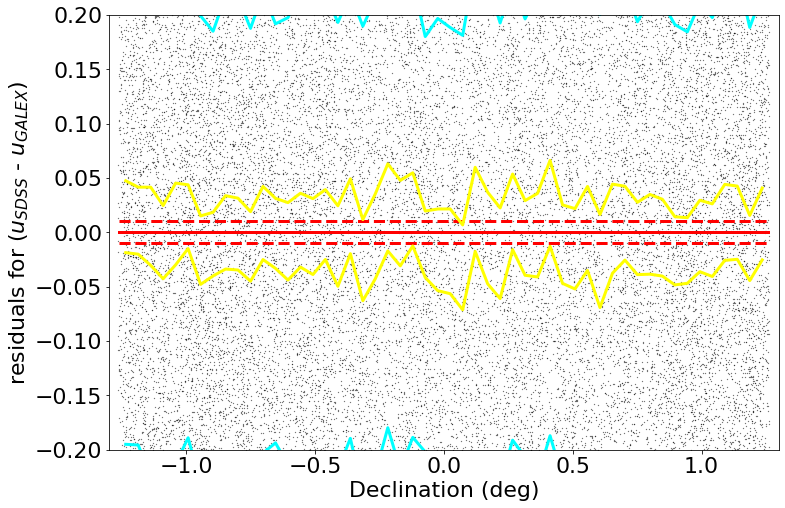

medianAll: -0.0016019999942395655 std.dev.All: 0.21333464097605995
N= 27416 min= -0.29995200004282196 max= 0.2999520001103534
median: -0.004032000135048022 std.dev: 0.01341840818182194
saved plot as: colorResidGALEXug_dra_Dec_Hess.png


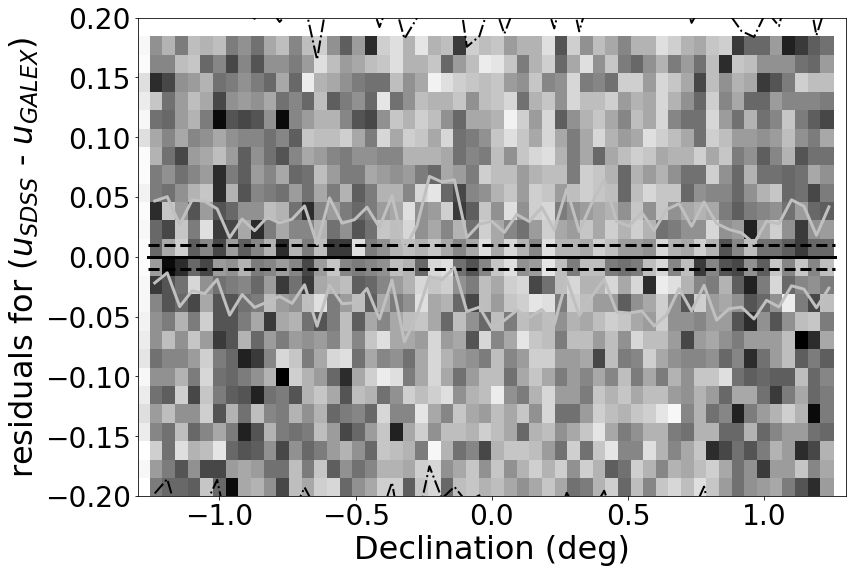

made plot colorResidGALEXug_dra_Dec_Hess.png
-----------
 stats for SDSS u binning medians:
medianAll: -0.0016019999942395655 std.dev.All: 0.21333464097605995
N= 27416 min= -0.29995200004282196 max= 0.2999520001103534
median: -0.004463999899200766 std.dev: 0.018854670271762415
saved plot as: colorResidGALEXug_dra_umag.png


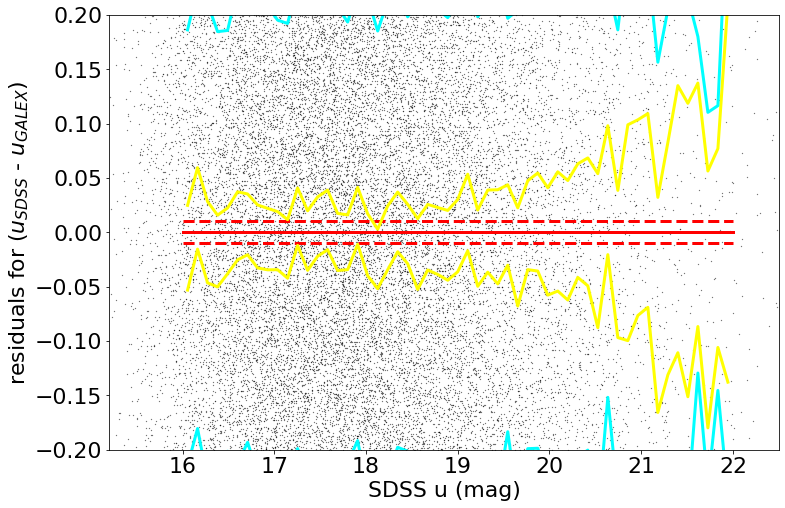

medianAll: -0.0016019999942395655 std.dev.All: 0.21333464097605995
N= 27416 min= -0.29995200004282196 max= 0.2999520001103534
median: -0.004463999899200766 std.dev: 0.018854670271762415
saved plot as: colorResidGALEXug_dra_umag_Hess.png


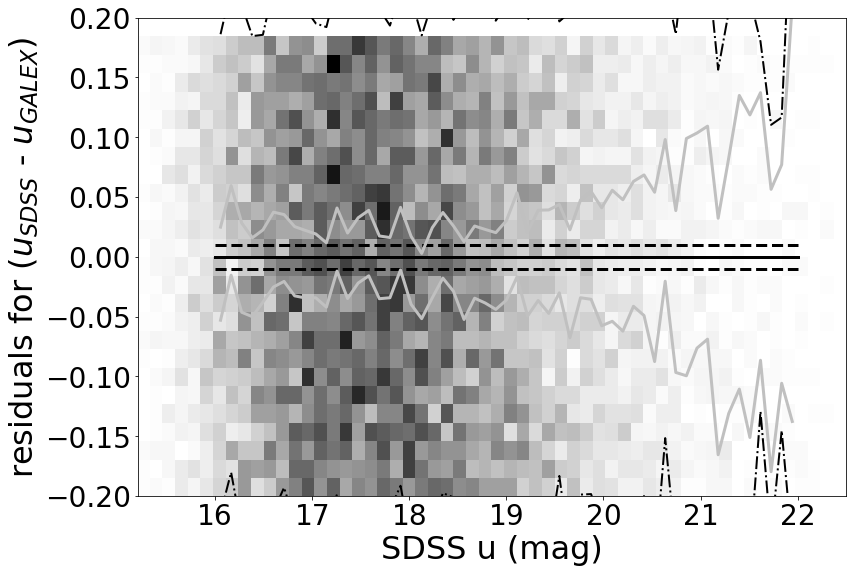

made plot colorResidGALEXug_dra_umag_Hess.png
------------------------------------------------------------------
=========== WORKING ON: ddec ===================
 stats for RA binning medians:
medianAll: -0.0015119999994438471 std.dev.All: 0.21316791599999246
N= 27179 min= -0.29995200000014377 max= 0.2999520000000083
median: -0.004607999999795512 std.dev: 0.027512496553140118
saved plot as: colorResidGALEXug_ddec_RA.png


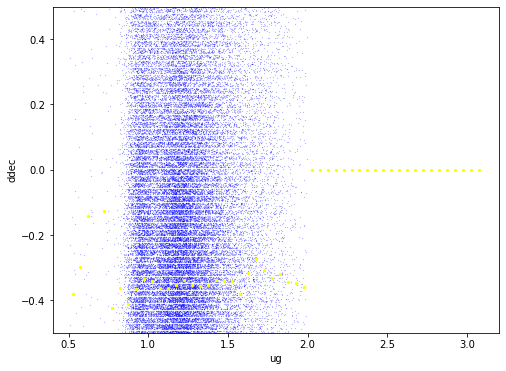

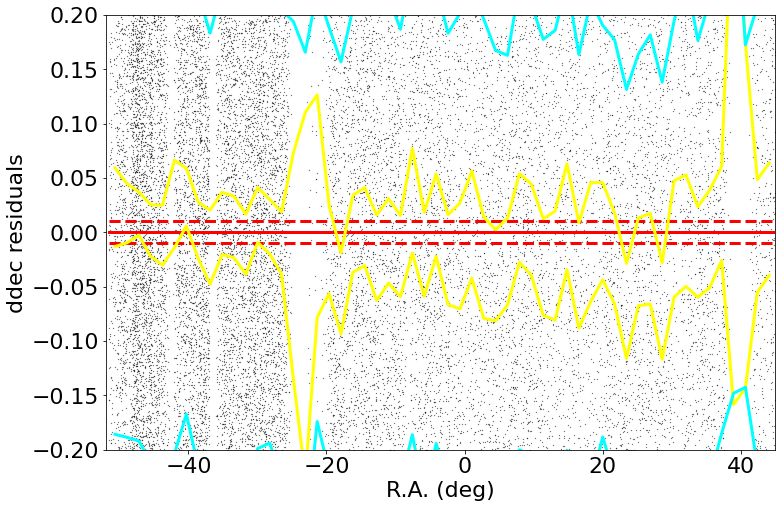

made plot colorResidGALEXug_ddec_RA.png
medianAll: -0.0015119999994438471 std.dev.All: 0.21316791599999246
N= 27179 min= -0.29995200000014377 max= 0.2999520000000083
median: -0.0010259999998597086 std.dev: 0.02524973709214676
saved plot as: colorResidGALEXug_ddec_RA_Hess.png


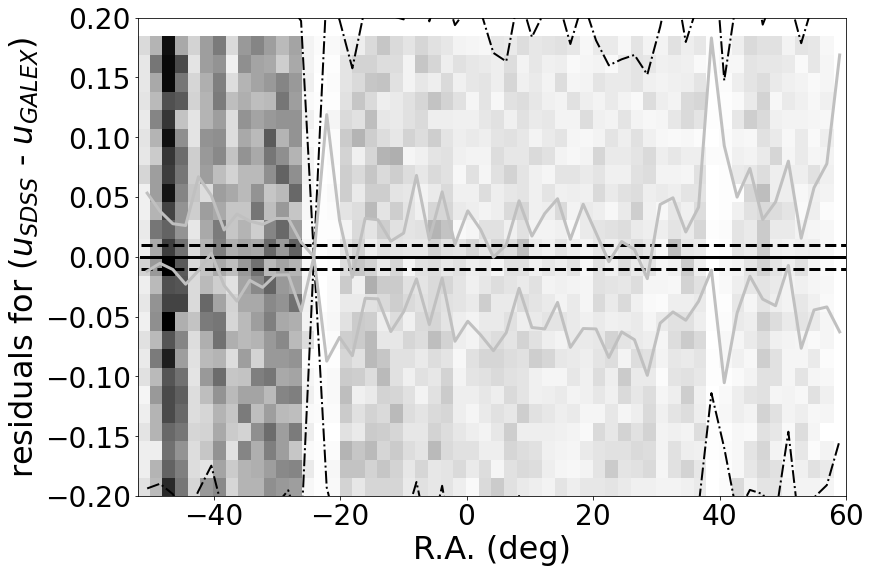

-----------
 stats for Dec binning medians:
medianAll: -0.0015119999994438471 std.dev.All: 0.21316791599999246
N= 27179 min= -0.29995200000014377 max= 0.2999520000000083
median: -0.0026819999996290367 std.dev: 0.013589113937222444
saved plot as: colorResidGALEXug_ddec_Dec.png


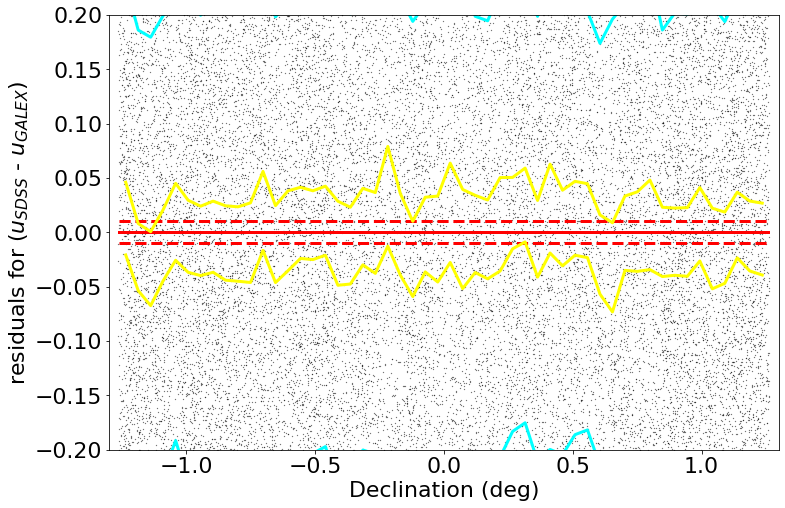

medianAll: -0.0015119999994438471 std.dev.All: 0.21316791599999246
N= 27179 min= -0.29995200000014377 max= 0.2999520000000083
median: -0.0016920000000486546 std.dev: 0.013126364253355113
saved plot as: colorResidGALEXug_ddec_Dec_Hess.png


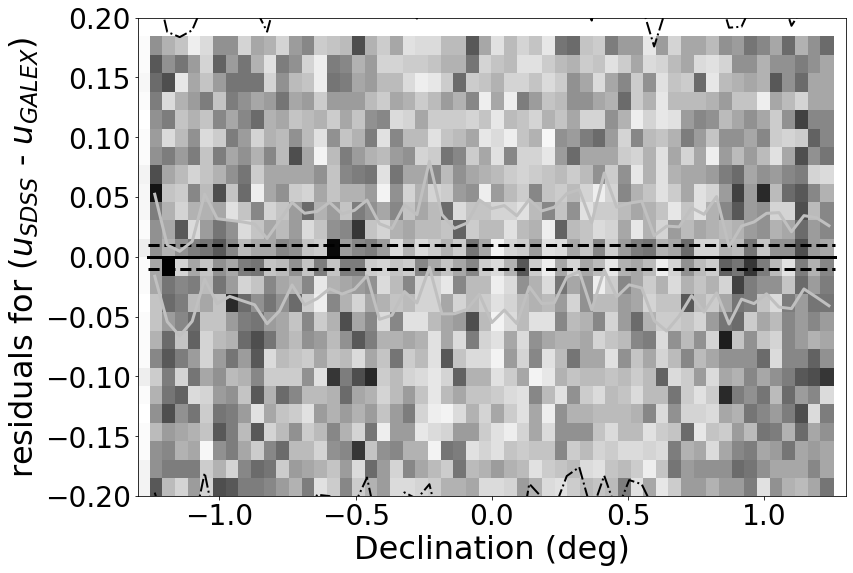

made plot colorResidGALEXug_ddec_Dec_Hess.png
-----------
 stats for SDSS u binning medians:
medianAll: -0.0015119999994438471 std.dev.All: 0.21316791599999246
N= 27179 min= -0.29995200000014377 max= 0.2999520000000083
median: -0.0007919999999765337 std.dev: 0.014358456978110364
saved plot as: colorResidGALEXug_ddec_umag.png


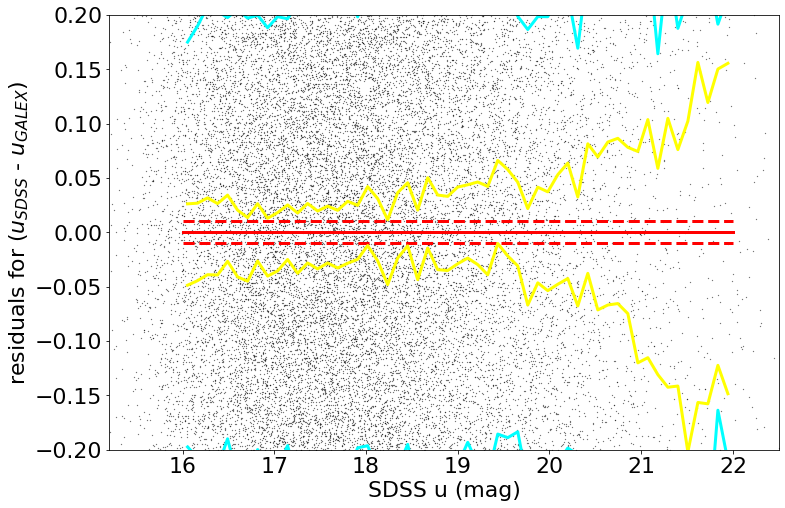

medianAll: -0.0015119999994438471 std.dev.All: 0.21316791599999246
N= 27179 min= -0.29995200000014377 max= 0.2999520000000083
median: -0.0007919999999765337 std.dev: 0.014358456978110364
saved plot as: colorResidGALEXug_ddec_umag_Hess.png


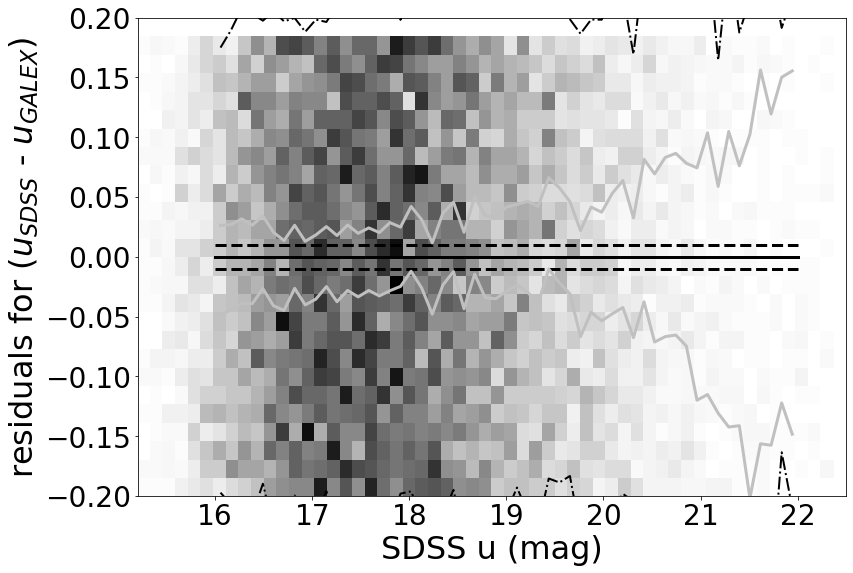

made plot colorResidGALEXug_ddec_umag_Hess.png
------------------------------------------------------------------


In [22]:
# Note, that even with the transformation equation used above, 
#  Zeljko's method improves upon it...
# So it makes sense to use the transformation equation to "get
#  to the right ballpark" and then use Zeljko's method to 
#  refine the results...
keywords = {"Xstr":'ug', "plotNameRoot":'colorResidGALEXug_', "symbSize":0.05}
for color in ('du_est', 'dra', 'ddec'):
    keywords["Ystr"] = color 
    doOneColor(sdssGALEXug, keywords)

=========== WORKING ON: du_est ===================
 stats for RA binning medians:
medianAll: -0.0001056208665999924 std.dev.All: 0.05453636369503505
N= 79860 min= -0.29985098162959734 max= 0.2995129152464032
median: 0.0009811945851027535 std.dev: 0.008691305548675332
saved plot as: colorResidGALEXug_du_est_RA.png


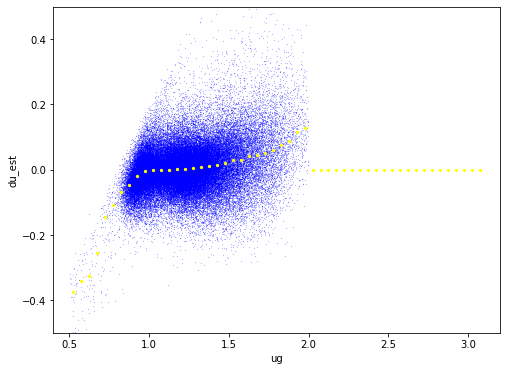

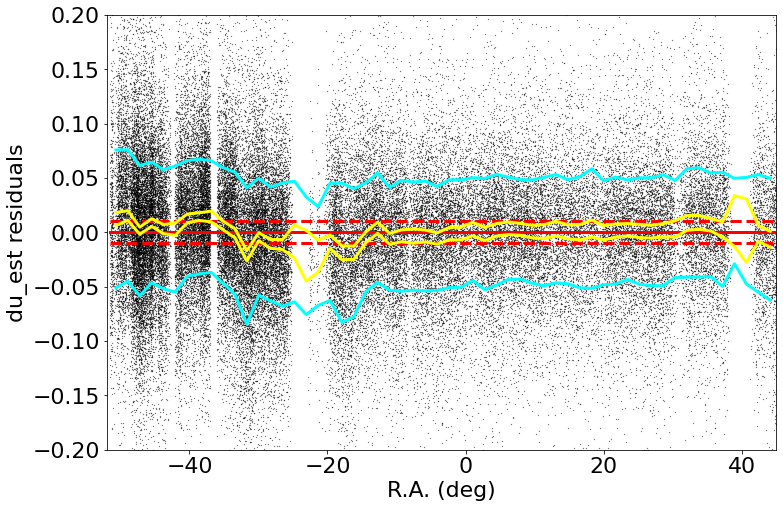

made plot colorResidGALEXug_du_est_RA.png
medianAll: -0.0001056208665999924 std.dev.All: 0.05453636369503505
N= 79860 min= -0.29985098162959734 max= 0.2995129152464032
median: 2.501259855016116e-05 std.dev: 0.009172412484645604
saved plot as: colorResidGALEXug_du_est_RA_Hess.png


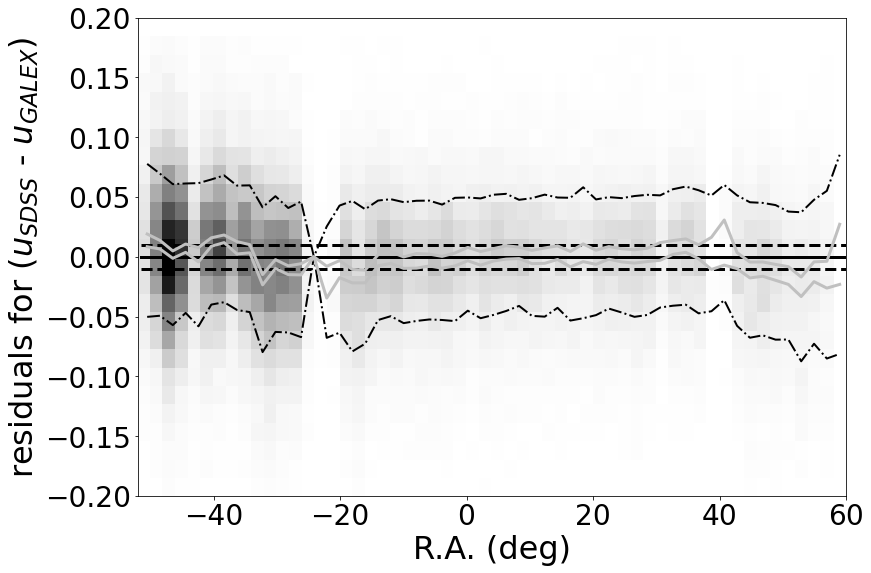

-----------
 stats for Dec binning medians:
medianAll: -0.0001056208665999924 std.dev.All: 0.05453636369503505
N= 79860 min= -0.29985098162959734 max= 0.2995129152464032
median: -0.001124326405796009 std.dev: 0.005324759578708154
saved plot as: colorResidGALEXug_du_est_Dec.png


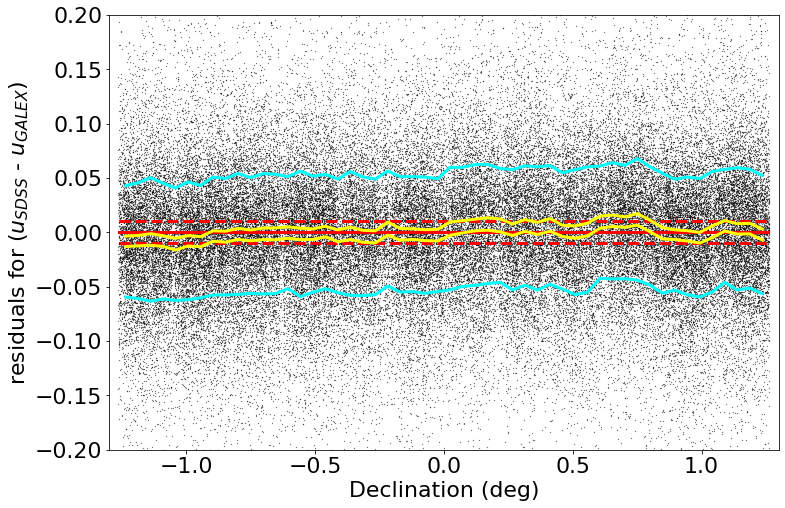

medianAll: -0.0001056208665999924 std.dev.All: 0.05453636369503505
N= 79860 min= -0.29985098162959734 max= 0.2995129152464032
median: -0.0013579919087984256 std.dev: 0.005210972701913607
saved plot as: colorResidGALEXug_du_est_Dec_Hess.png


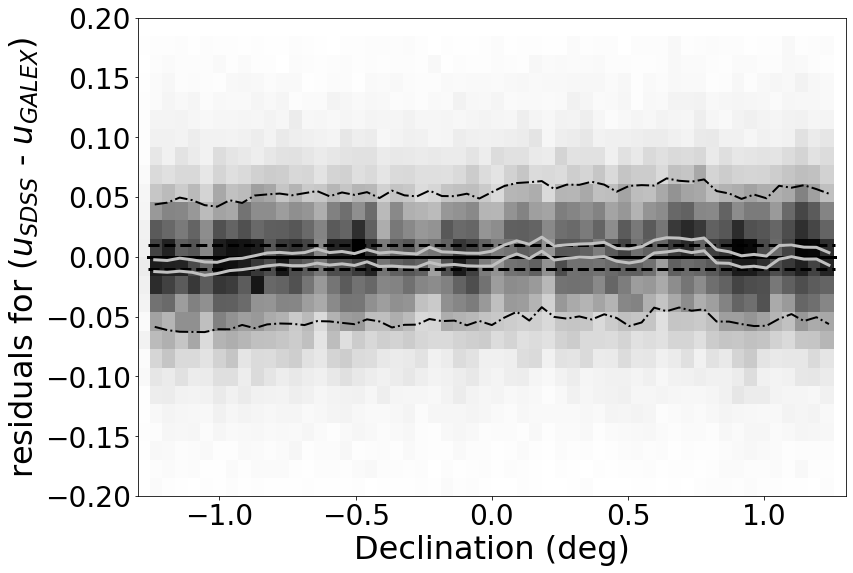

made plot colorResidGALEXug_du_est_Dec_Hess.png
-----------
 stats for SDSS u binning medians:
medianAll: -0.0001056208665999924 std.dev.All: 0.05453636369503505
N= 79860 min= -0.29985098162959734 max= 0.2995129152464032
median: 0.0033065039885996584 std.dev: 0.024499690059484908
saved plot as: colorResidGALEXug_du_est_umag.png


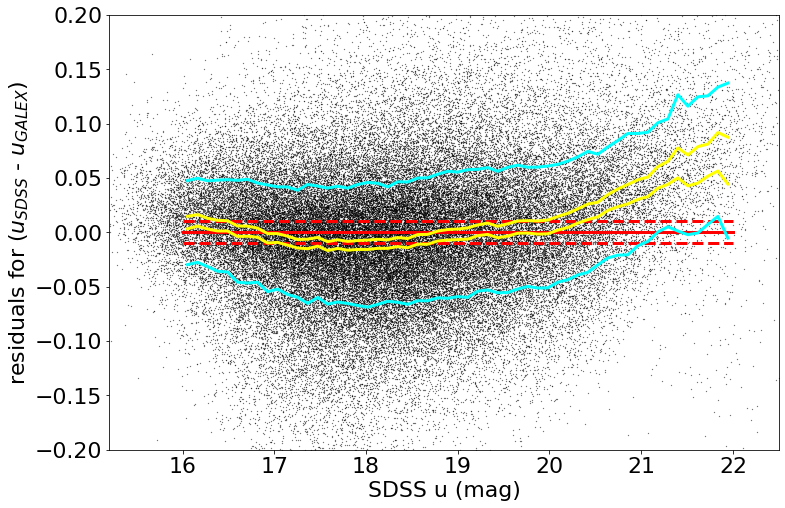

medianAll: -0.0001056208665999924 std.dev.All: 0.05453636369503505
N= 79860 min= -0.29985098162959734 max= 0.2995129152464032
median: 0.0033065039885996584 std.dev: 0.024499690059484908
saved plot as: colorResidGALEXug_du_est_umag_Hess.png


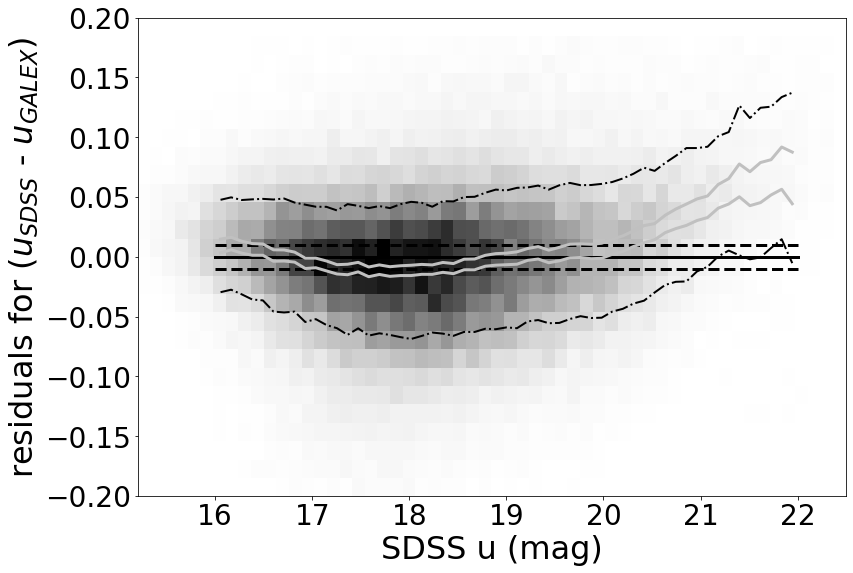

made plot colorResidGALEXug_du_est_umag_Hess.png
------------------------------------------------------------------


In [23]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# Fig 16 (u_sdss - u_GALEX vs. SDSS u) of the manuscript comes from this cell!  #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 


keywords = {"Xstr":'ug', "plotNameRoot":'colorResidGALEXug_', "symbSize":0.05}
color = 'du_est' 
keywords["Ystr"] = color 
doOneColor(sdssGALEXug, keywords)

=========== WORKING ON: du_est ===================
 stats for RA binning medians:
medianAll: 0.0001662132360011892 std.dev.All: 0.052886935578403266
N= 69731 min= -0.2985109049676004 max= 0.2995433730620017
median: 0.0016969085600025001 std.dev: 0.009050719785894537
saved plot as: colorResidGALEXbright_du_est_RA.png


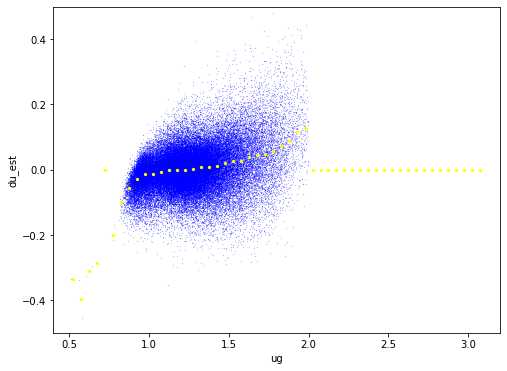

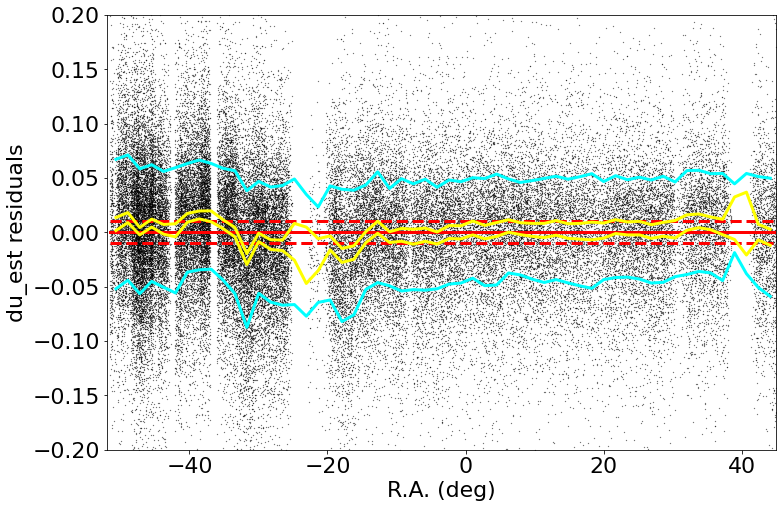

made plot colorResidGALEXbright_du_est_RA.png
medianAll: 0.0001662132360011892 std.dev.All: 0.052886935578403266
N= 69731 min= -0.2985109049676004 max= 0.2995433730620017
median: 0.0009178493766513595 std.dev: 0.009529078651400588
saved plot as: colorResidGALEXbright_du_est_RA_Hess.png


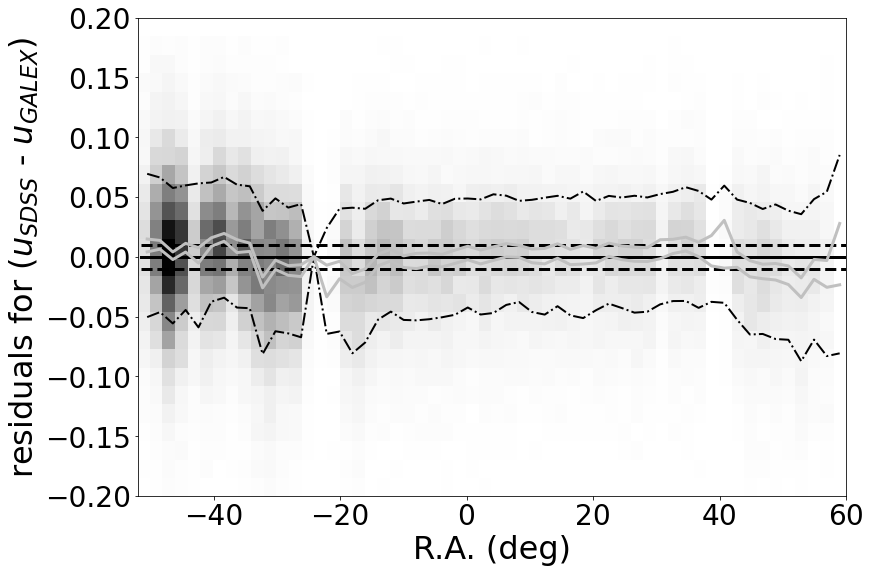

-----------
 stats for Dec binning medians:
medianAll: 0.0001662132360011892 std.dev.All: 0.052886935578403266
N= 69731 min= -0.2985109049676004 max= 0.2995433730620017
median: -0.0005839331590000196 std.dev: 0.005121776722358383
saved plot as: colorResidGALEXbright_du_est_Dec.png


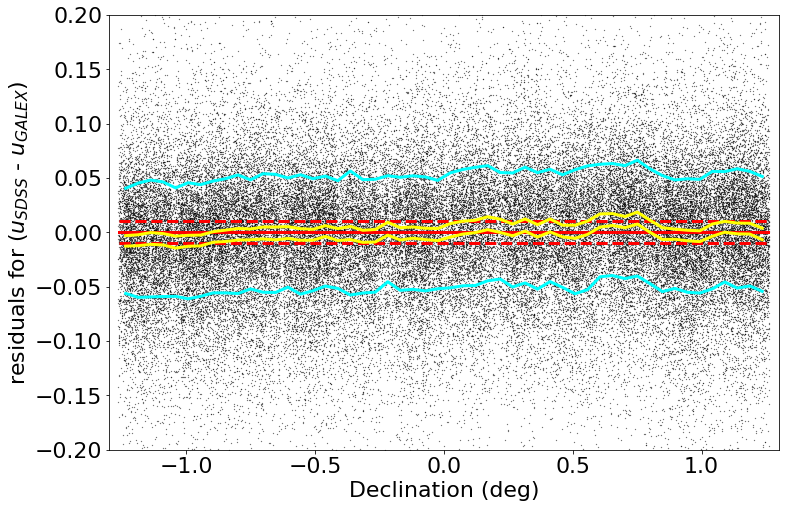

medianAll: 0.0001662132360011892 std.dev.All: 0.052886935578403266
N= 69731 min= -0.2985109049676004 max= 0.2995433730620017
median: -0.0006823310358979023 std.dev: 0.005001383624039843
saved plot as: colorResidGALEXbright_du_est_Dec_Hess.png


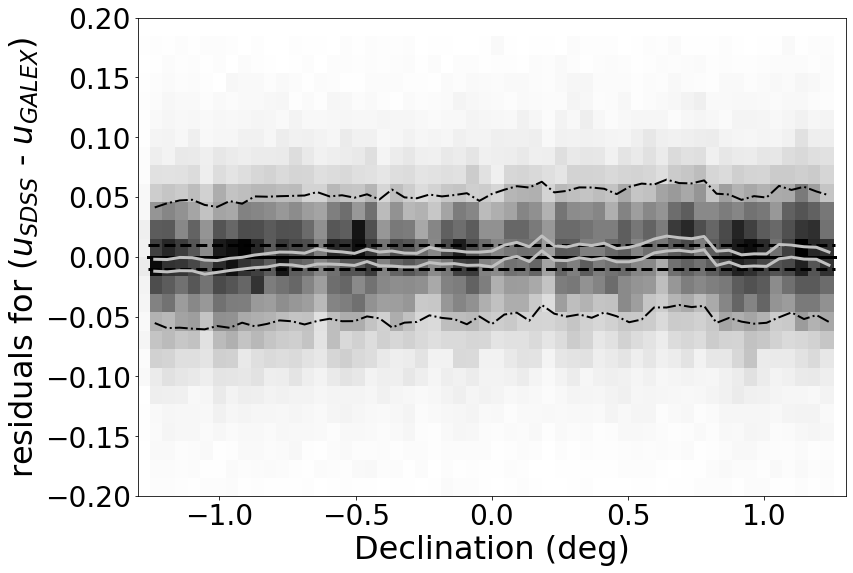

made plot colorResidGALEXbright_du_est_Dec_Hess.png
-----------
 stats for SDSS u binning medians:
medianAll: 0.0001662132360011892 std.dev.All: 0.052886935578403266
N= 69731 min= -0.2985109049676004 max= 0.2995433730620017
median: 0.0017554979842023411 std.dev: 0.00795280396276322
saved plot as: colorResidGALEXbright_du_est_umag.png


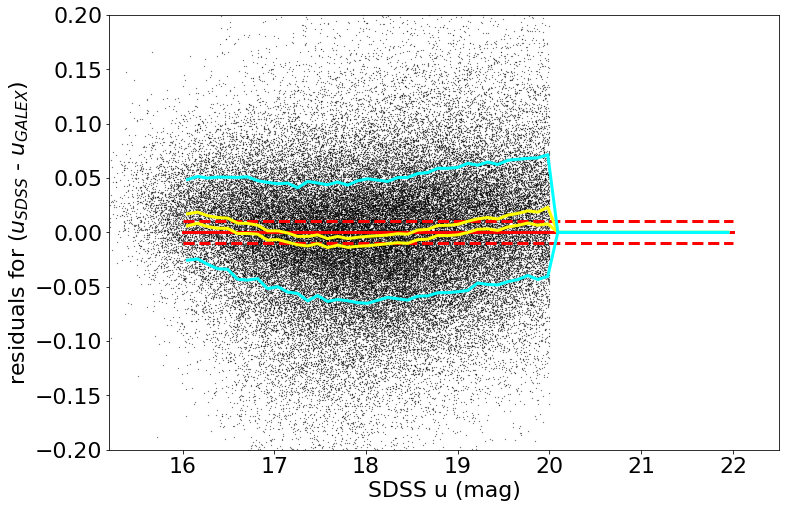

medianAll: 0.0001662132360011892 std.dev.All: 0.052886935578403266
N= 69731 min= -0.2985109049676004 max= 0.2995433730620017
median: 0.0017554979842023411 std.dev: 0.00795280396276322
saved plot as: colorResidGALEXbright_du_est_umag_Hess.png


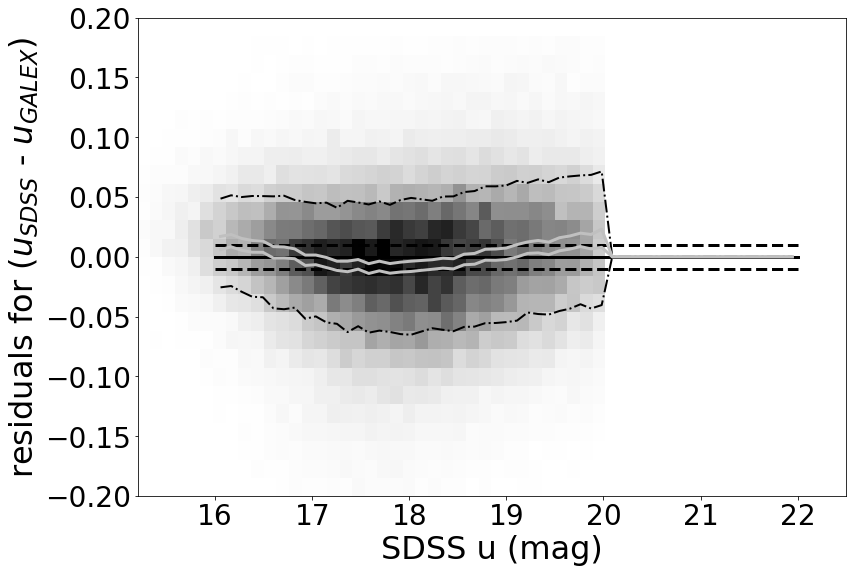

made plot colorResidGALEXbright_du_est_umag_Hess.png
------------------------------------------------------------------


In [24]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# Fig 17 (u_sdss - u_GALEX vs. RA and u_sdss - u_GALEX vs. Dec) of the manuscript comes from this cell! #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

keywords = {"Xstr":'ug', "plotNameRoot":'colorResidGALEXbright_', "symbSize":0.05}
color = 'du_est' 
keywords["Ystr"] = color 
doOneColor(sdssGALEXbright, keywords)

In [25]:
#keywords = {"Xstr":'ug', "plotNameRoot":'colorResidGALEXbright_', "symbSize":0.05}
#for color in ('du_est', 'dra', 'ddec'):
#    keywords["Ystr"] = color 
#    doOneColor(sdssGALEXbright, keywords)

In [26]:
#plotName = 'colorResidGALEXbright_CFISupsfVSuauto.png' 
#Ylabel = 'CFIS upsf-uauto (mag)'
#kwOC = {"Xstr":'upsf', "Xmin":15, "Xmax":22, "Xlabel":'CFIS upsf (mag)', \
#          "Ystr":'duCFIS', "Ymin":-0.07, "Ymax":0.07, "Ylabel":Ylabel, \
#          "XminBin":15.5, "XmaxBin":21.5, "nBin":55, \
#          "plotName":plotName, "Nsigma":3, "offset":0.01, "symbSize":0.05}
#zit.plotdelMag(sdssCFISbright, kwOC)

=========== WORKING ON: du_est ===================
 stats for RA binning medians:
medianAll: 0.0001662132360011892 std.dev.All: 0.052886935578403266
N= 69731 min= -0.2985109049676004 max= 0.2995433730620017
median: 0.0017882364380032226 std.dev: 0.00869408791156907
-0.02288280046367381 0.03028572480004582 0.009208726758681262
saved plot as: colorResidGALEX_Gaia_du_est_RA.png


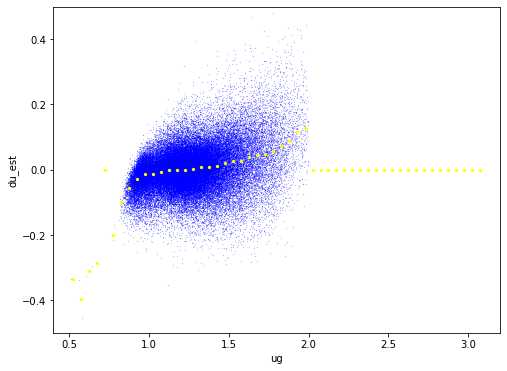

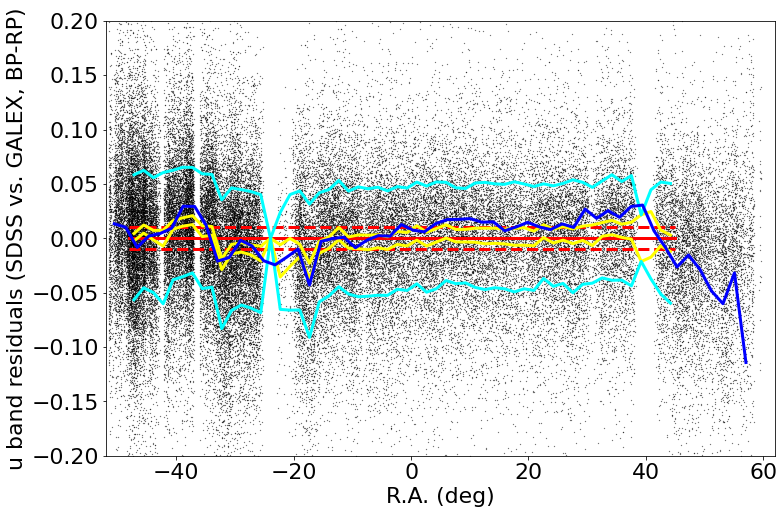

made plot colorResidGALEX_Gaia_du_est_RA.png


In [27]:
keywords = {"Xstr":'ug', "plotNameRoot":'colorResidGALEX_Gaia_', "symbSize":0.05}
keywords["Ystr"] = 'du_est' 
doOneColorRA(sdssGALEXbright, keywords)

=========== WORKING ON: du_est ===================
-----------
 stats for Dec binning medians:
medianAll: 0.0001662132360011892 std.dev.All: 0.052886935578403266
N= 69731 min= -0.2985109049676004 max= 0.2995433730620017
median: -0.00058299486279584 std.dev: 0.004897465651283413
-0.03321895920789765 0.02575639768277481 0.01506339447784838
saved plot as: colorResidGALEX_Gaia_du_est_Dec.png


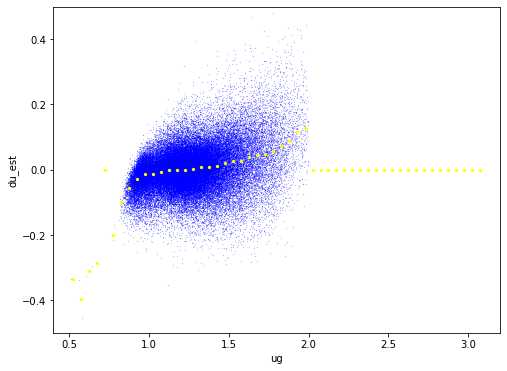

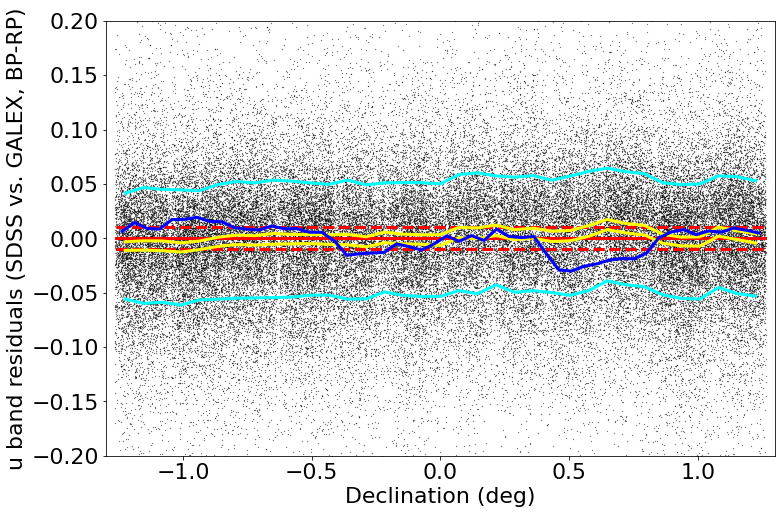

made plot colorResidGALEX_Gaia_du_est_Dec.png


In [28]:
keywords = {"Xstr":'ug', "plotNameRoot":'colorResidGALEX_Gaia_', "symbSize":0.05}
keywords["Ystr"] = 'du_est' 
doOneColorDec(sdssGALEXbright, keywords)

In [29]:
sdssGALEX

<Table length=89722>
     ra_galex            dec_galex       ...     ra       dec   
     float64              float64        ...  float64   float64 
------------------ --------------------- ... --------- ---------
         11.199782             -0.098591 ... 11.199835 -0.098666
         11.106634  -0.15775899999999998 ... 11.106689 -0.157773
         11.169508  -0.22026500000000002 ... 11.169757 -0.220399
         11.265742              0.105018 ... 11.265475  0.104336
         11.214072  -0.13786900000000002 ... 11.214181 -0.138094
         11.317245              0.066076 ... 11.317794  0.065728
11.147996000000001              -0.01034 ... 11.148219  -0.01022
         11.349125  0.057541999999999996 ... 11.349236  0.057383
         11.074131             -0.075951 ...  11.07418 -0.076275
11.114692999999999 -0.061440999999999996 ... 11.114777 -0.061568
               ...                   ... ...       ...       ...
58.830431999999995               0.75802 ... 58.830588  0.757609
58.904481000000004              0.485653 ...  58.90446  0.485343
         58.932389              0.508606 ... 58.932436  0.508656
         58.573125              0.468371 ... 58.572656  0.468422
         58.856074              0.510733 ... 58.856091   0.51063
         58.832354   0.44851599999999997 ... 58.832064   0.44782
58.719378000000006    0.6644359999999999 ... 58.719437  0.664446
         58.685587              0.527753 ... 58.686132  0.527778
58.623743999999995    0.5126649999999999 ... 58.624005   0.51265
58.624148999999996              0.456409 ... 58.624049  0.456468

(0.0, 0.2)

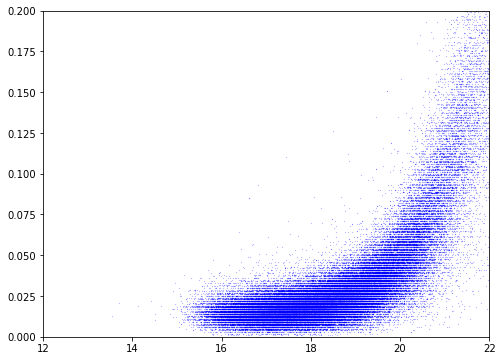

In [30]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.scatter(sdssGALEX['u_mMed'], sdssGALEX['u_rms_scatt'], s=0.01, c='blue')
ax.set_xlim(12,22)
ax.set_ylim(0.0,0.2)